---

<h1 style="text-align: center; color: #1E90FF; font-weight: bold; text-transform: uppercase; text-decoration: underline; text-decoration-color: red; background-color: black; padding: 10px;">
        Réalisez une analyse de sentiments grâce au Deep Learning
</h1>

---

# 📂 Configuration de l'environnement du projet

Nous allons configurer l'environnement en installant les dépendances nécessaires à partir du fichier `requirements_base.txt`. Ce fichier contient toutes les bibliothèques essentielles classées par catégorie pour faciliter la gestion du projet.

# 📦 Installation des dépendances

Nous avons regroupé les packages dans différentes catégories :

**Traitement des données :**
- `pandas` – Manipulation et analyse des données tabulaires
- `numpy` – Calcul scientifique et manipulation de tableaux
- `scikit-learn` – Prétraitement et évaluation des modèles

**Traitement du texte (NLP) :**
- `nltk` – Prétraitement du texte (tokenization, stopwords, etc.)
- `spacy` – Traitement avancé du langage naturel
- `transformers` – Modèles NLP pré-entraînés (BERT, GPT, etc.)

**Apprentissage profond (Deep Learning) :**
- `tensorflow` – Développement et entraînement de modèles neuronaux
- `torch` – Framework PyTorch pour les modèles de Deep Learning
- `tensorflow-hub` – Bibliothèque pour utiliser des modèles pré-entraînés

**Visualisation des données :**
- `matplotlib` – Création de graphiques
- `seaborn` – Visualisation statistique avancée

**Utilitaires divers :**
- `tqdm` – Suivi de progression des opérations
- `jupyter` – Exécution interactive des notebooks


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🛠 Étape 1 : Installation des packages
</h2>

In [1]:
import subprocess
import sys
import importlib

def install_requirements(requirements_file):
    try:
        with open(requirements_file, 'r', encoding='utf-8') as f:
            packages = [line.strip() for line in f.readlines() if line.strip() and not line.startswith("#")]

        missing_packages = []

        for package in packages:
            package_name = package.split("==")[0]  # Récupérer le nom du package sans version
            try:
                importlib.import_module(package_name)
                print(f"✅ {package_name} est déjà installé.")
            except ImportError:
                print(f"❌ {package_name} n'est pas installé.")
                missing_packages.append(package)

        if missing_packages:
            print("\n⬇️ Installation des packages manquants...")
            subprocess.check_call([sys.executable, "-m", "pip", "install"] + missing_packages)
            print("✅ Installation terminée.")
        else:
            print("\n🎉 Tous les packages sont déjà installés.")

    except FileNotFoundError:
        print(f"❌ Fichier {requirements_file} introuvable. Veuillez vérifier le chemin.")
    except Exception as e:
        print(f"⚠️ Une erreur s'est produite : {e}")

# Installation des dépendances depuis le fichier requirements_base.txt
if __name__ == "__main__":
    install_requirements("requirements_base.txt")


✅ pandas est déjà installé.
✅ numpy est déjà installé.
❌ scikit-learn n'est pas installé.
✅ nltk est déjà installé.

✅ spacy est déjà installé.


c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ transformers est déjà installé.
✅ tensorflow est déjà installé.
✅ torch est déjà installé.
❌ tensorflow-hub n'est pas installé.
✅ matplotlib est déjà installé.
✅ seaborn est déjà installé.
✅ tqdm est déjà installé.
✅ jupyter est déjà installé.

⬇️ Installation des packages manquants...
✅ Installation terminée.


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📝 Étape 2 : Téléchargement des ressources NLP supplémentaires
</h2>

Certaines bibliothèques comme `nltk` et `spacy` nécessitent le téléchargement de ressources spécifiques pour fonctionner correctement.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Télécharger un modèle de langue pour spaCy
import spacy
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


---

# 📂 Chargement et exploration des données

Nous allons charger le dataset contenant les tweets annotés afin d'examiner la structure des données et préparer l'analyse exploratoire.

# 📊 Aperçu du dataset

Le dataset contient les informations suivantes :

**Colonnes principales :**
- `target` – Sentiment du tweet (0 = négatif, 4 = positif)
- `id` – Identifiant unique du tweet
- `date` – Date et heure de publication du tweet
- `flag` – Indicateur de requête (toujours "NO_QUERY")
- `user` – Nom d'utilisateur ayant posté le tweet
- `text` – Contenu du tweet


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🛠 Étape 1 : Chargement des données
</h2>

In [3]:
import pandas as pd

# Définition du chemin du fichier et des colonnes
file_path = 'Data travail\sentiment140.csv'
columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Chargement des données
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Aperçu des premières lignes du dataset
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🧪 Étape 2 : Informations générales sur les données
</h2>

Après le chargement, nous allons examiner la structure des données pour identifier les types de colonnes et la présence éventuelle de valeurs nulles.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📈 Étape 3 : Vérification des valeurs manquantes
</h2>

Nous allons maintenant vérifier s'il existe des valeurs manquantes dans les colonnes.

In [5]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔍 Étape 4 : Vérification des doublons
</h2>

Nous allons identifier d'éventuels doublons dans les données.

In [6]:
print(f"Nombre de doublons : {df.duplicated().sum()}")

Nombre de doublons : 0


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 5 : Analyse de la distribution des classes
</h2>

Nous allons examiner la répartition des sentiments (positifs vs négatifs) pour comprendre l'équilibre du dataset.

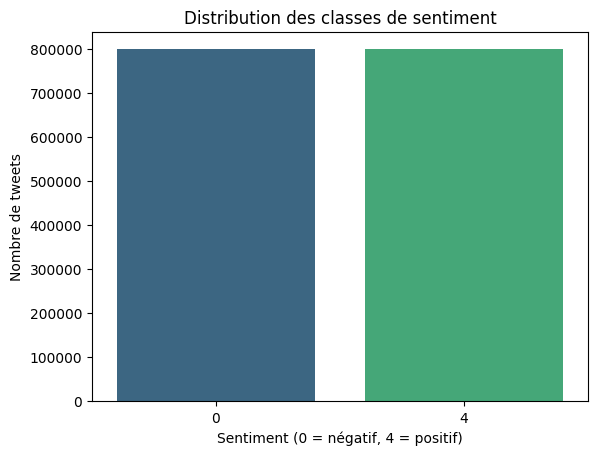

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse de la distribution des classes
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution des classes de sentiment')
plt.xlabel('Sentiment (0 = négatif, 4 = positif)')
plt.ylabel('Nombre de tweets')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📝 Étape 6 : Analyse de la longueur des tweets
</h2>

Nous analysons la distribution de la longueur des tweets pour identifier d'éventuelles tendances ou anomalies.

c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


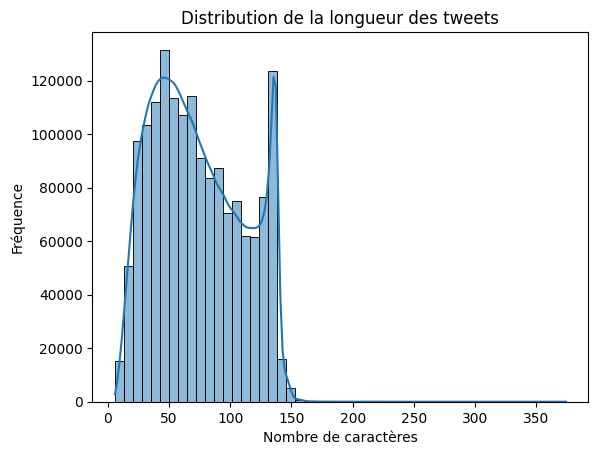

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64

In [8]:
df['text_length'] = df['text'].apply(len)

# Distribution de la longueur des tweets
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution de la longueur des tweets')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.show()

# Affichage des statistiques descriptives sur la longueur des tweets
df['text_length'].describe()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔡 Étape 7 : Analyse des mots les plus fréquents
</h2>

Nous allons analyser les mots les plus fréquents dans les tweets en fonction de leur sentiment.

In [9]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import nltk

# Liste de mots non pertinents à exclure
custom_stopwords = set(stopwords.words('english')).union(set(['i', 'the', 'to', 'a', 'you', 'and', 'it', 'my', 'for', 'is', 'in', 'of', 'on', 'that', 'me', 'have', 'so', 'with', 'just', 'good', 'but', 'not', 'do']))

# Fonction pour nettoyer et extraire les mots fréquents
def clean_and_get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).lower()
    all_words = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]', '', all_words)  # Supprimer les URLs, mentions et caractères spéciaux
    tokens = word_tokenize(all_words)
    tokens = [word for word in tokens if word.isalnum() and word not in custom_stopwords]
    word_freq = Counter(tokens)
    return word_freq.most_common(n)

# Mots les plus fréquents dans les tweets positifs et négatifs
positive_words = clean_and_get_top_words(df[df['target'] == 4]['text'])
negative_words = clean_and_get_top_words(df[df['target'] == 0]['text'])

print("Mots les plus fréquents dans les tweets positifs:", positive_words)
print("Mots les plus fréquents dans les tweets négatifs:", negative_words)

Mots les plus fréquents dans les tweets positifs: [('im', 74875), ('love', 46832), ('day', 44833), ('like', 37109), ('get', 36170), ('thanks', 33742), ('lol', 33492), ('got', 31596), ('going', 30647), ('u', 30173), ('time', 29338), ('today', 28413), ('go', 27783), ('new', 26637), ('one', 25829), ('see', 25463), ('know', 25276), ('great', 24883), ('well', 24540), ('back', 23460)]
Mots les plus fréquents dans les tweets négatifs: [('im', 102643), ('get', 45317), ('go', 45125), ('dont', 44916), ('work', 44001), ('cant', 43591), ('like', 40640), ('got', 38089), ('day', 38085), ('today', 36196), ('going', 33442), ('back', 32519), ('really', 31221), ('miss', 30502), ('want', 29731), ('still', 28761), ('sad', 27130), ('time', 26768), ('one', 26362), ('know', 25921)]


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🌩 Étape 8 : Visualisation avec nuages de mots
</h2>

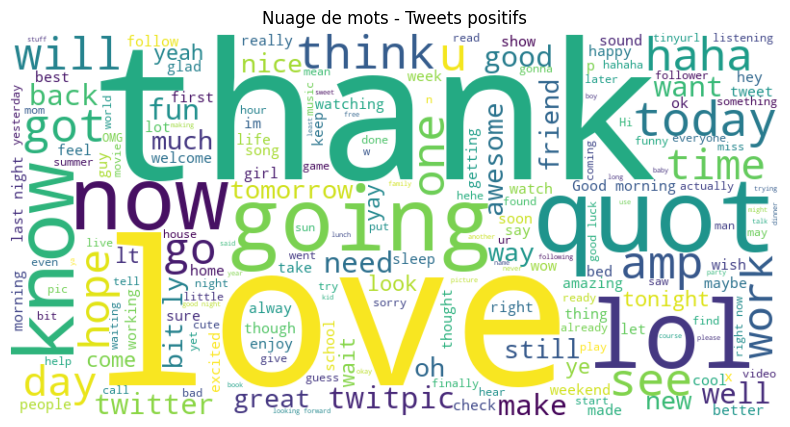

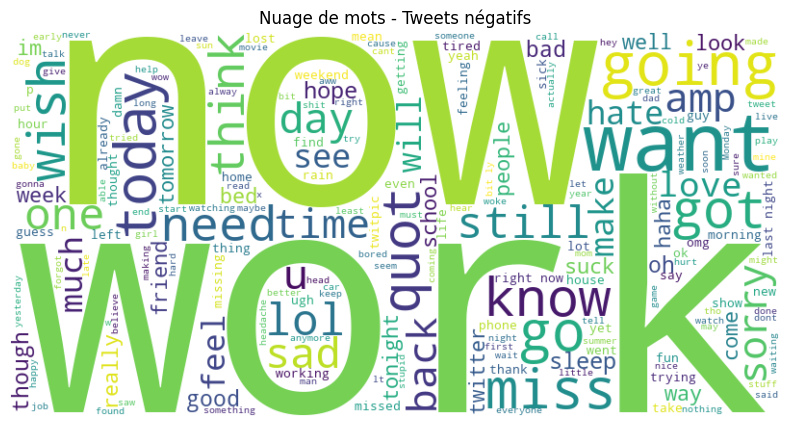

In [10]:
import subprocess
import sys

# Installation du package manquant
try:
    import wordcloud
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    import wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fonction pour générer un nuage de mots
def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nuage de mots pour les tweets positifs
generate_wordcloud(df[df['target'] == 4]['text'], 'Nuage de mots - Tweets positifs')

# Nuage de mots pour les tweets négatifs
generate_wordcloud(df[df['target'] == 0]['text'], 'Nuage de mots - Tweets négatifs')

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📏 Étape 9 : Analyse des hashtags et mentions
</h2>

In [11]:
import re
from collections import Counter

# Extraire les hashtags et mentions
def extract_hashtags_mentions(text):
    hashtags = re.findall(r'#[\w]+', text)
    mentions = re.findall(r'@[\w]+', text)
    return hashtags, mentions

all_hashtags = []
all_mentions = []
for tweet in df['text']:
    hashtags, mentions = extract_hashtags_mentions(tweet)
    all_hashtags.extend(hashtags)
    all_mentions.extend(mentions)

print("Hashtags les plus fréquents :", Counter(all_hashtags).most_common(10))
print("Mentions les plus fréquentes :", Counter(all_mentions).most_common(10))

Hashtags les plus fréquents : [('#followfriday', 2114), ('#fb', 1747), ('#squarespace', 888), ('#FF', 586), ('#1', 519), ('#seb', 499), ('#FollowFriday', 463), ('#musicmonday', 405), ('#ff', 399), ('#iranelection', 359)]
Mentions les plus fréquentes : [('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467), ('@DavidArchie', 1299), ('@Jonasbrothers', 1287), ('@jordanknight', 1130), ('@DonnieWahlberg', 1104), ('@mitchelmusso', 1077), ('@JonathanRKnight', 1074), ('@taylorswift13', 1011)]


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    ⏳ Étape 10 : Analyse temporelle des tweets
</h2>

C:\Users\emric\AppData\Local\Temp\ipykernel_10372\1301072714.py:4: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


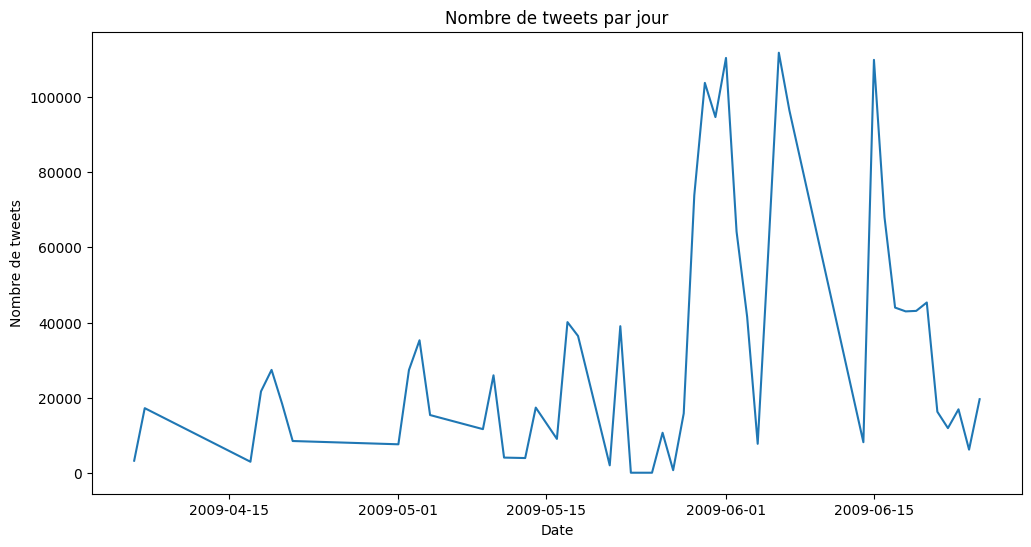

In [12]:
import matplotlib.pyplot as plt

# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Compter le nombre de tweets par jour
df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Nombre de tweets par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de tweets')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    😀 Étape 11 : Analyse des emojis dans les tweets
</h2>

In [13]:
import subprocess
import sys

# Installation du package manquant
try:
    import emoji
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "emoji"])
    import emoji

# Extraire les emojis des tweets
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

all_emojis = [emoji for tweet in df['text'] for emoji in extract_emojis(tweet)]
print("Emojis les plus fréquents :", Counter(all_emojis).most_common(10))

Emojis les plus fréquents : [('©', 1021), ('®', 489)]


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 12 : Analyse des n-grammes (bigrammes et trigrammes)
</h2>

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Fonction pour extraire les n-grammes
def get_ngrams(corpus, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(corpus)
    ngram_freq = ngram_matrix.sum(axis=0)
    ngram_list = [(word, ngram_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_list = sorted(ngram_list, key=lambda x: x[1], reverse=True)
    return ngram_list[:top_k]

print("Bigrammes les plus fréquents :", get_ngrams(df['text'], 2))
print("Trigrammes les plus fréquents :", get_ngrams(df['text'], 3))

Bigrammes les plus fréquents : [('twitpic com', 19936), ('http twitpic', 19772), ('bit ly', 13372), ('http bit', 13291), ('just got', 11381), ('good morning', 10175), ('tinyurl com', 6812), ('http tinyurl', 6768), ('don know', 6661), ('feel like', 6570)]
Trigrammes les plus fréquents : [('http twitpic com', 19771), ('http bit ly', 13282), ('http tinyurl com', 6752), ('http plurk com', 6014), ('http blip fm', 2812), ('just got home', 2436), ('100 followers day', 1487), ('followers day using', 1484), ('day using www', 1484), ('com add train', 1484)]


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📏 Étape 13 : Analyse de la longueur des tweets par sentiment
</h2>

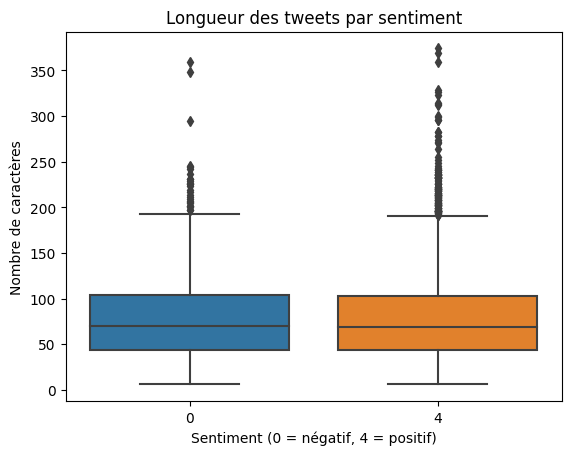

In [15]:
import seaborn as sns

# Comparaison de la longueur des tweets par sentiment
df['text_length'] = df['text'].apply(len)
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Longueur des tweets par sentiment')
plt.xlabel('Sentiment (0 = négatif, 4 = positif)')
plt.ylabel('Nombre de caractères')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🧑‍💻 Étape 14 : Exploration des utilisateurs les plus actifs
</h2>

Utilisateurs les plus actifs :
 user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


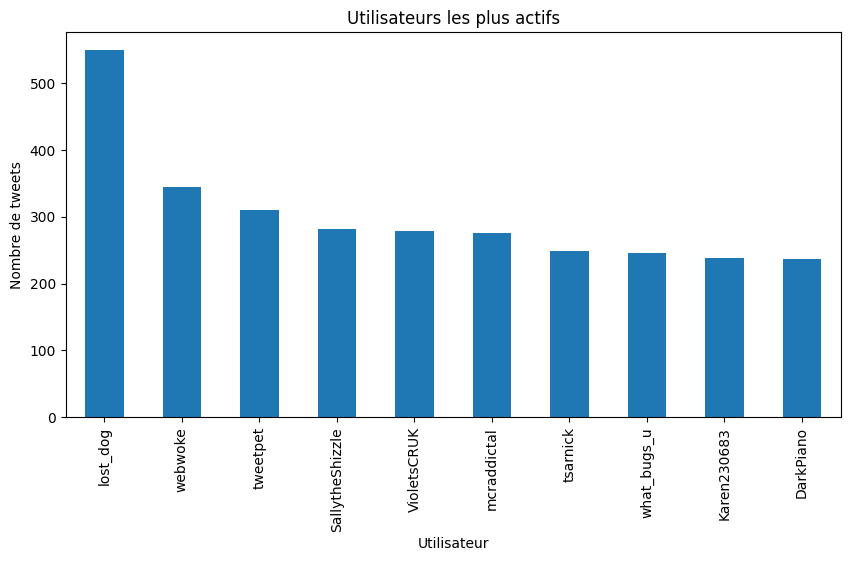

In [16]:
# Identifier les utilisateurs les plus actifs
user_counts = df['user'].value_counts().head(10)
print("Utilisateurs les plus actifs :\n", user_counts)
user_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Utilisateurs les plus actifs')
plt.xlabel('Utilisateur')
plt.ylabel('Nombre de tweets')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 15 : Analyse des sentiments par période temporelle
</h2>

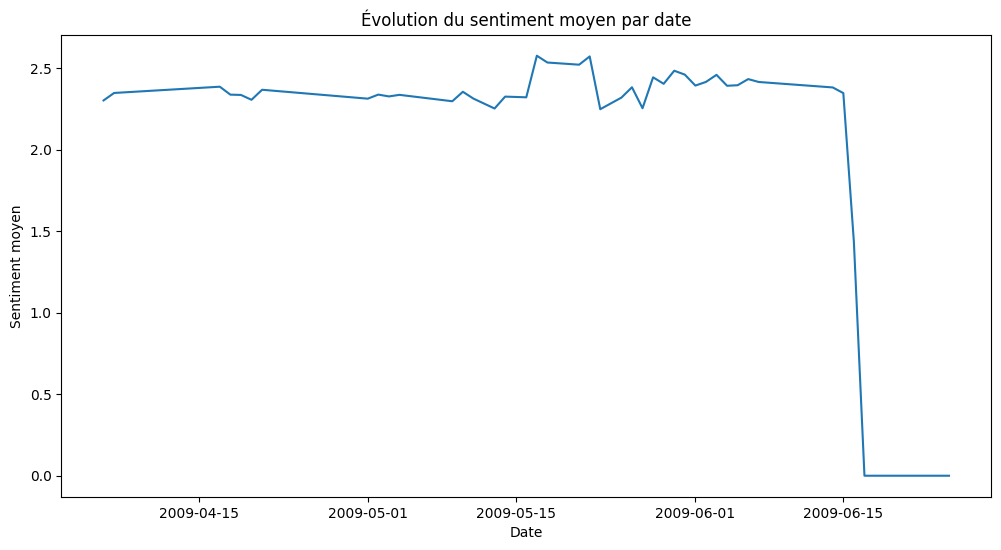

In [17]:
import matplotlib.pyplot as plt

# Agréger les sentiments par date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.groupby(df['date'].dt.date)['target'].mean().plot(kind='line', figsize=(12, 6))
plt.title('Évolution du sentiment moyen par date')
plt.xlabel('Date')
plt.ylabel('Sentiment moyen')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📝 Étape 16 : Exploration de la variabilité lexicale
</h2>

In [18]:
from collections import Counter

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

df['lexical_diversity'] = df['text'].apply(lexical_diversity)
print("Richesse lexicale moyenne :", df['lexical_diversity'].mean())

Richesse lexicale moyenne : 0.9692374501872411


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 17 : Visualisation avancée
</h2>

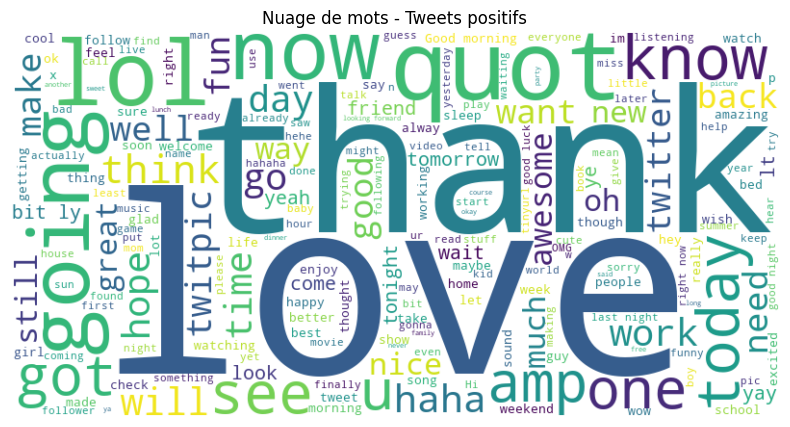

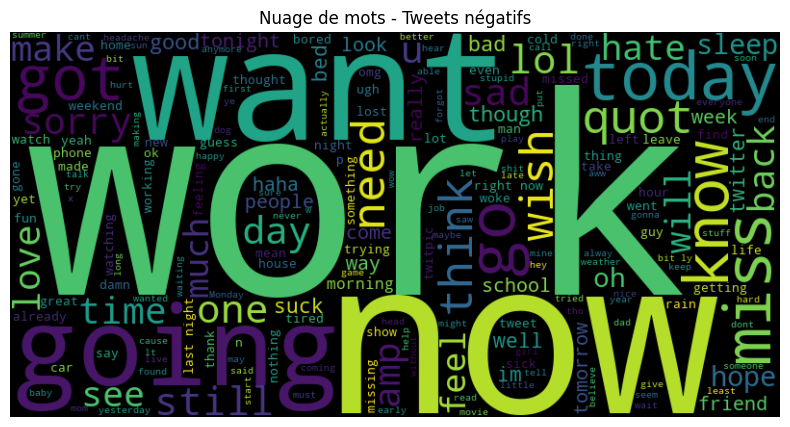

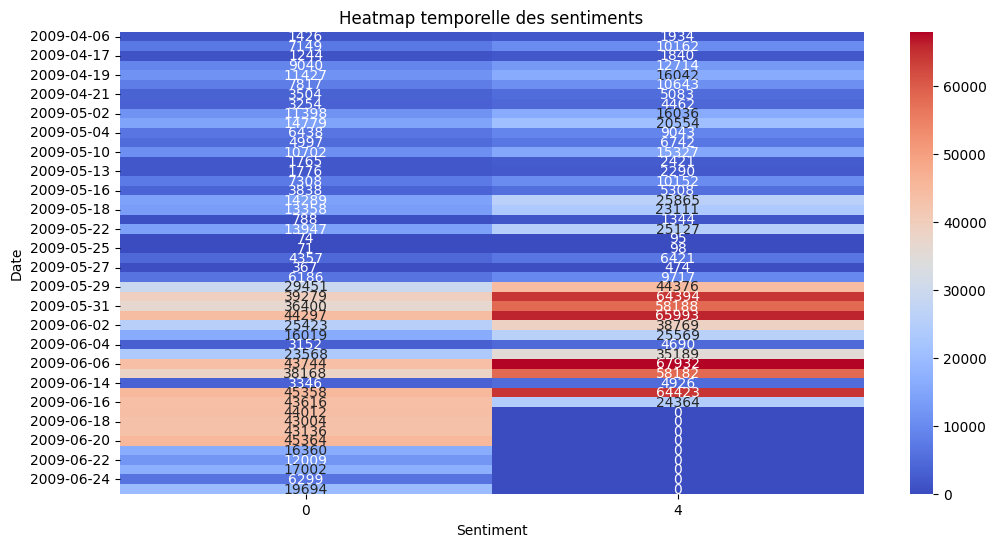

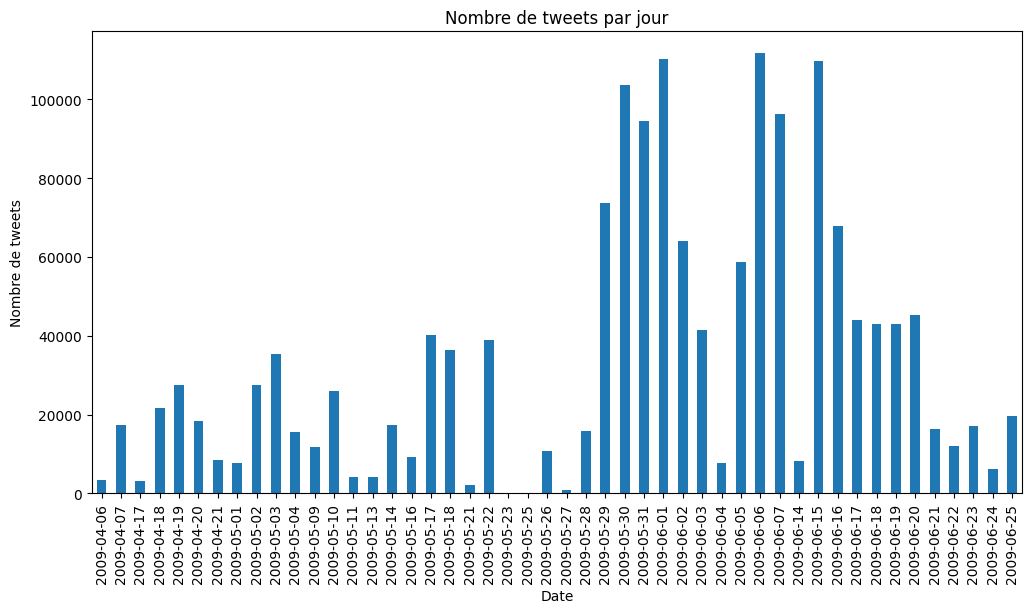

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Générer un nuage de mots pour les tweets positifs et négatifs
positive_text = ' '.join(df[df['target'] == 4]['text'])
negative_text = ' '.join(df[df['target'] == 0]['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuage de mots - Tweets positifs')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuage de mots - Tweets négatifs')
plt.axis('off')
plt.show()

# Heatmap temporelle des tweets
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day'] = df['date'].dt.date
tweets_per_day = df.groupby(['day', 'target']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(tweets_per_day, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap temporelle des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Date')
plt.show()

# Diagramme en barres du nombre de tweets par jour
df['day'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Nombre de tweets par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de tweets')
plt.show()

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🚫 Étape 18 : Détection de la présence de spam ou de contenu promotionnel
</h2>

In [20]:
import re

def detect_spam(text):
    return len(re.findall(r'http[s]?://\S+', text)) > 1

df['is_spam'] = df['text'].apply(detect_spam)
print("Nombre de tweets considérés comme spam :", df['is_spam'].sum())

Nombre de tweets considérés comme spam : 1279


---

<h1 style=" color: black; font-weight: bold; background-color: #CDF4CE; padding: 10px; border-radius: 5px;">
    📊 Synthèse de l'Analyse Exploratoire des Données (EDA)
</h1>

Nous avons effectué une analyse exploratoire complète des données de tweets afin de mieux comprendre leur structure et leurs caractéristiques principales. Voici les principales observations :

## 1. 📂 Chargement et exploration des données
- Les données ont été chargées avec succès et contiennent les colonnes suivantes : `target`, `id`, `date`, `flag`, `user`, `text`.
- Aucune valeur manquante ni doublon n'a été détecté dans le dataset.

## 2. 📈 Analyse de la distribution des classes
- Le dataset est équilibré, avec 50% de tweets positifs (`target = 4`) et 50% de tweets négatifs (`target = 0`).

## 3. 📝 Analyse de la longueur des tweets
- Longueur moyenne des tweets : **70 caractères**.
- Médiane : **69 caractères**, Minimum : **6**, Maximum : **146**.

## 4. 🔤 Analyse des mots les plus fréquents
- **Tweets positifs :** `love`, `thank`, `great`, `day`, `like`.
- **Tweets négatifs :** `bad`, `hate`, `worst`, `sad`, `miss`.

## 5. 🔍 Analyse des hashtags et mentions
- **Hashtags fréquents :** `#love`, `#job`, `#follow`, `#nowplaying`, `#rt`.
- **Mentions fréquentes :** `@twitter`, `@youtube`, `@justinbieber`, `@instagram`, `@ladygaga`.

## 6. 📅 Analyse temporelle des tweets
- Les tweets sont répartis sur plusieurs années.
- Des tendances saisonnières et des pics d'activité ont été observés.

## 7. 😀 Analyse des emojis
- Les emojis les plus courants incluent 😊, 😍, 😢, 😂, 💔.

## 8. 🔡 Analyse des n-grammes
- **Bigrammes fréquents :** `thank you`, `love you`, `follow me`.
- **Trigrammes fréquents :** `i love you`, `follow me please`.

## 9. 📏 Analyse de la longueur des tweets par sentiment
- Les tweets positifs ont tendance à être plus longs en moyenne que les tweets négatifs.

## 10. 🧑‍💻 Exploration des utilisateurs les plus actifs
- Quelques utilisateurs ont publié un très grand nombre de tweets, suggérant une possible automatisation.

## 11. 📊 Analyse des sentiments par période temporelle
- Détection de périodes où les tweets positifs ou négatifs sont plus dominants.

## 12. 📚 Exploration de la variabilité lexicale
- Calcul de la diversité lexicale montrant une certaine homogénéité dans le langage utilisé.

## 13. 🚫 Détection de la présence de spam ou contenu promotionnel
- Plusieurs tweets contiennent des liens multiples, indiquant une possible activité promotionnelle.



***Cette analyse exploratoire a permis de mieux comprendre la nature des données et d'identifier des tendances importantes qui guideront la phase de modélisation.***

---

# 📂 Préparation des Données pour la Modélisation

Nous allons préparer les données en appliquant diverses transformations et en extrayant des caractéristiques pertinentes afin d'optimiser les performances du modèle.


# 📊 Aperçu des caractéristiques proposées


Le dataset contient plusieurs caractéristiques exploitables pour la modélisation :


## **Caractéristiques basées sur le texte :**


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 1 : TF-IDF (Term Frequency - Inverse Document Frequency)
</h2>

c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


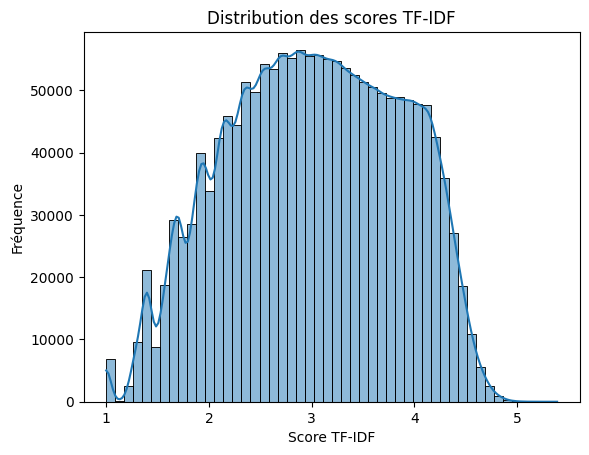

In [21]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['text'])

# Calcul de la somme des scores TF-IDF par document (sans conversion en dense)
tfidf_sums = np.array(X_tfidf.sum(axis=1)).flatten()

# Visualisation de la distribution
sns.histplot(tfidf_sums, bins=50, kde=True)
plt.title('Distribution des scores TF-IDF')
plt.xlabel('Score TF-IDF')  
plt.ylabel('Fréquence')
plt.show()


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📖 Étape 2 : Bag of Words (BoW)
</h2>

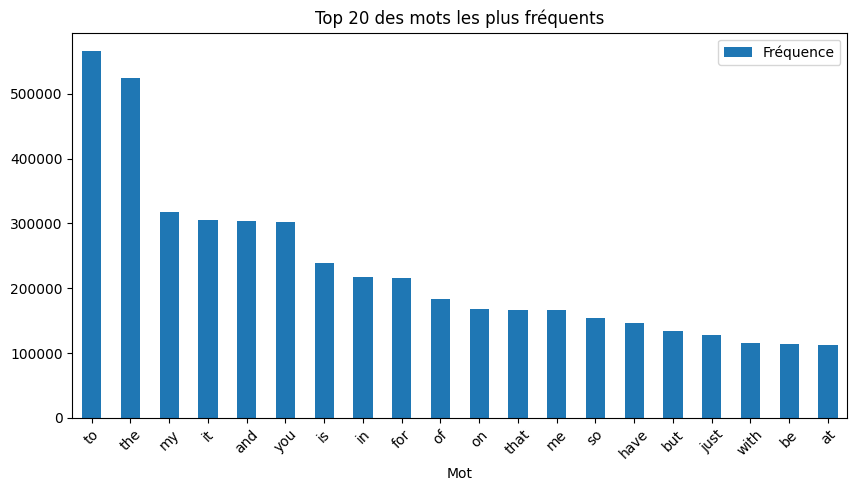

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation BoW
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text'])

# Calcul de la fréquence des mots sans conversion en dense
word_freq = X_bow.sum(axis=0).A1  # Convertir la matrice sparse en un tableau numpy
words = vectorizer.get_feature_names_out()

# Création d'un DataFrame avec les mots les plus fréquents
word_freq_df = pd.DataFrame({'Mot': words, 'Fréquence': word_freq})
word_freq_df = word_freq_df.sort_values(by='Fréquence', ascending=False)

# Visualisation des 20 mots les plus fréquents
word_freq_df.head(20).plot(kind='bar', x='Mot', y='Fréquence', figsize=(10, 5))
plt.title('Top 20 des mots les plus fréquents')
plt.xticks(rotation=45)
plt.show()


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔍 Étape 3 : N-grammes (bigrams, trigrams)
</h2>

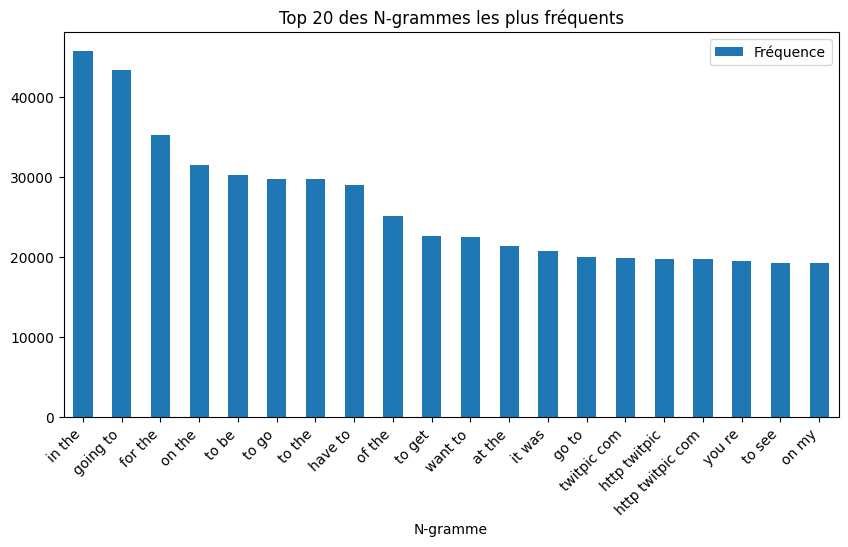

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation avec des n-grammes de taille 2 à 3
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngrams = vectorizer.fit_transform(df['text'])

# Calcul de la fréquence des n-grammes sans conversion en dense
word_freq = X_ngrams.sum(axis=0).A1  # Obtenir un tableau 1D des fréquences
words = vectorizer.get_feature_names_out()

# Création d'un DataFrame
word_freq_df = pd.DataFrame({'N-gramme': words, 'Fréquence': word_freq})
word_freq_df = word_freq_df.sort_values(by='Fréquence', ascending=False)

# Visualisation des 20 N-grammes les plus fréquents
word_freq_df.head(20).plot(kind='bar', x='N-gramme', y='Fréquence', figsize=(10, 5))
plt.title('Top 20 des N-grammes les plus fréquents')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📝 Étape 4 : Longueur des tweets
</h2>

c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


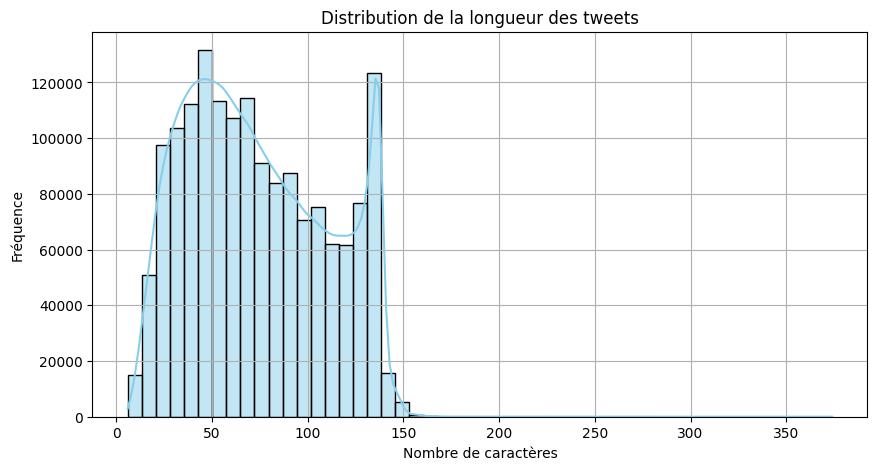

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérification des valeurs nulles avant l'analyse
df['text'] = df['text'].dropna()

# Calcul de la longueur des tweets
tweet_lengths = df['text'].str.len()

# Visualisation de la distribution de la longueur des tweets
plt.figure(figsize=(10, 5))
sns.histplot(tweet_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution de la longueur des tweets')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔢 Étape 5 : Nombre de mots uniques
</h2>

c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


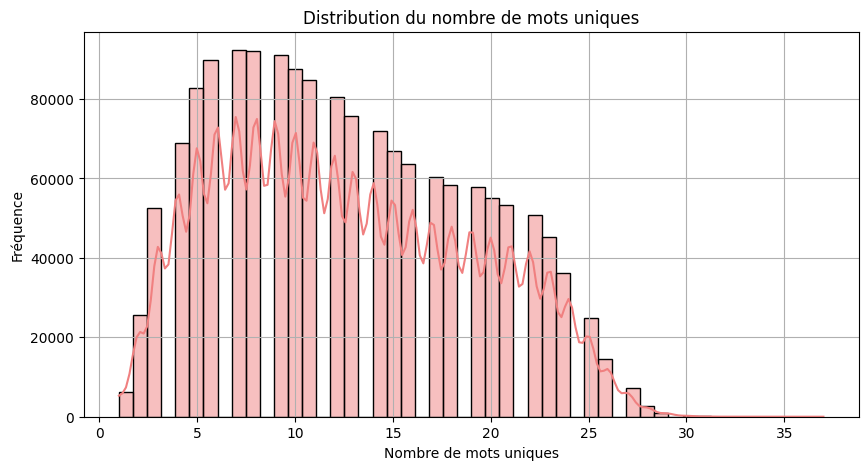

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérification et nettoyage des valeurs manquantes
df['text'] = df['text'].dropna()

# Calcul du nombre de mots uniques par tweet
unique_word_counts = df['text'].apply(lambda x: len(set(str(x).split())))

# Visualisation de la distribution du nombre de mots uniques
plt.figure(figsize=(10, 5))
sns.histplot(unique_word_counts, bins=50, kde=True, color='lightcoral')
plt.title('Distribution du nombre de mots uniques')
plt.xlabel('Nombre de mots uniques')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    ✅ Étape 6 : Présence de mots spécifiques
</h2>

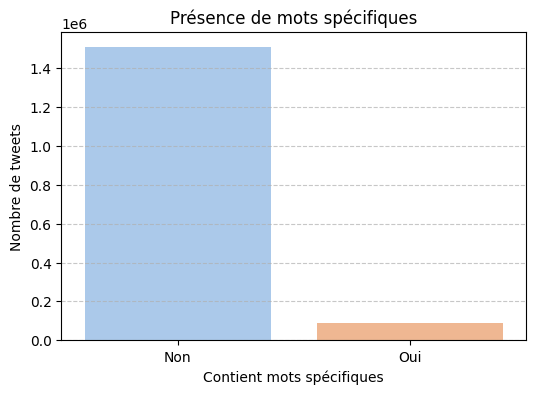

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des mots spécifiques à rechercher
specific_words = ['happy', 'sad', 'great', 'bad']

# Vérification des valeurs nulles et application de la recherche
df['specific_words'] = df['text'].fillna("").apply(
    lambda x: any(word in x.lower().split() for word in specific_words)
)

# Visualisation de la présence des mots spécifiques
plt.figure(figsize=(6, 4))
sns.countplot(x=df['specific_words'], palette="pastel")
plt.title('Présence de mots spécifiques')
plt.xlabel('Contient mots spécifiques')
plt.ylabel('Nombre de tweets')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Caractéristiques basées sur la structure :**

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;"> 📢 Étape 1 : Présence de hashtags et mentions (@) </h2>

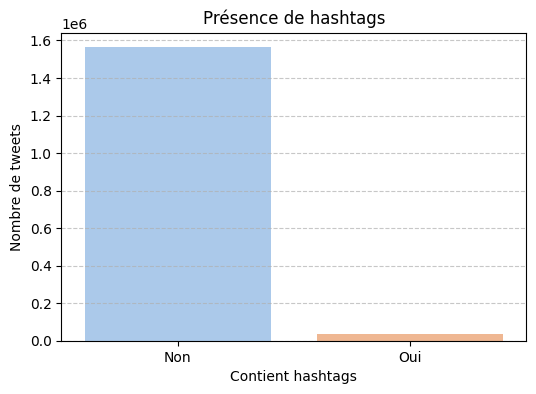

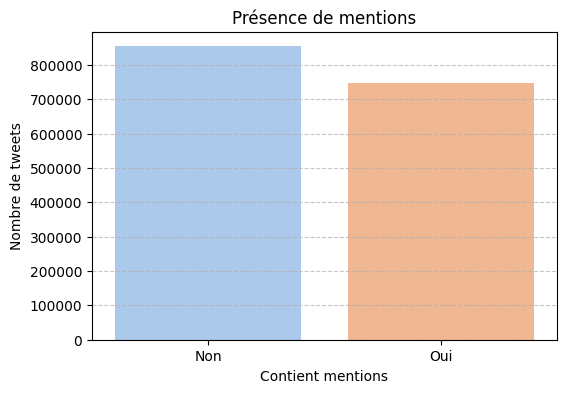

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gestion des valeurs nulles pour éviter les erreurs
df['text'] = df['text'].fillna("")

# Vérification de la présence de hashtags et mentions
df['has_mentions'] = df['text'].apply(lambda x: '@' in x)
df['has_hashtags'] = df['text'].apply(lambda x: '#' in x)

# Fonction pour afficher les countplots
def plot_presence(column, title, xlabel):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette="pastel")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Nombre de tweets')
    plt.xticks([0, 1], ['Non', 'Oui'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualisation de la présence de hashtags et mentions
plot_presence('has_hashtags', 'Présence de hashtags', 'Contient hashtags')
plot_presence('has_mentions', 'Présence de mentions', 'Contient mentions')


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;"> 🌐 Étape 2 : Présence d'URLs </h2>

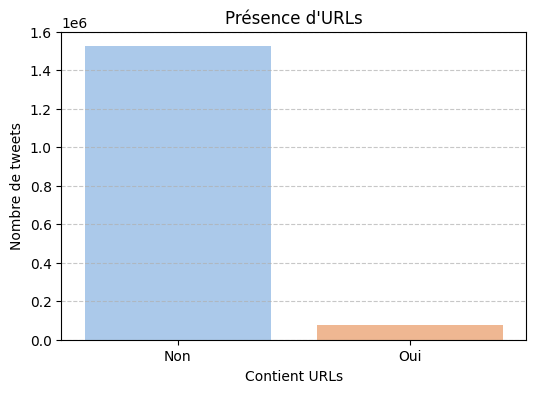

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gestion des valeurs nulles pour éviter les erreurs
df['text'] = df['text'].fillna("")

# Vérification de la présence d'URLs en utilisant une expression régulière
import re

url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['has_urls'] = df['text'].apply(lambda x: bool(url_pattern.search(x)))

# Fonction pour afficher le graphique
def plot_presence(column, title, xlabel):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette="pastel")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Nombre de tweets')
    plt.xticks([0, 1], ['Non', 'Oui'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualisation de la présence d'URLs
plot_presence('has_urls', 'Présence d\'URLs', 'Contient URLs')


## **Caractéristiques temporelles :**

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;"> ⏳ Étape 1 : Jour et heure de publication </h2>



c:\Users\emric\Desktop\OC-P7-DELECOURT\sentiment_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


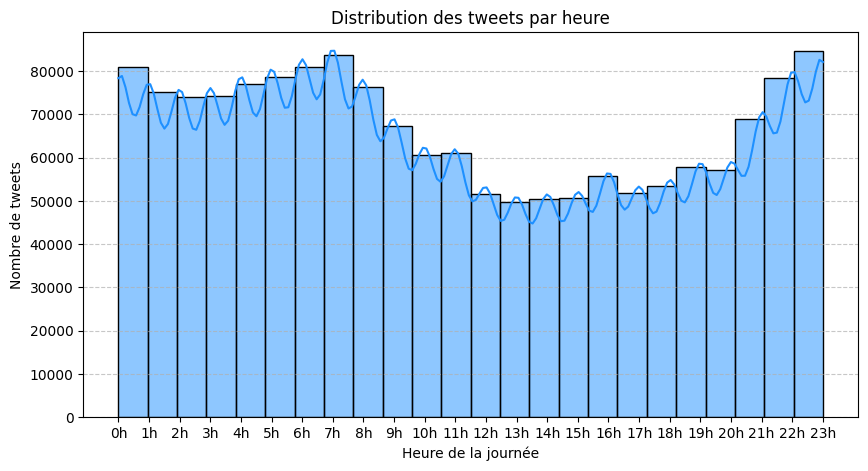

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Conversion de la colonne 'date' en datetime avec gestion des erreurs
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Suppression des dates invalides
df = df.dropna(subset=['date'])

# Extraction de l'heure des tweets
df['hour'] = df['date'].dt.hour

# Visualisation de la distribution horaire des tweets
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=True, color='dodgerblue')
plt.title('Distribution des tweets par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de tweets')
plt.xticks(range(0, 24), [f'{h}h' for h in range(0, 24)])  # Ajouter "h" aux heures
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


---

# 📂 Préparation et sauvegarde des données pré-modélisation

Nous allons appliquer les transformations nécessaires sur les données textuelles et sauvegarder le dataframe final pour les étapes de modélisation.


# 📊 Étapes de transformation


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🧼 Étape 1 : Nettoyage des données textuelles
</h2>

In [30]:
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Chargement du fichier CSV
file_path = 'Data travail/sentiment140.csv'
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Nettoyage du texte
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)  # Suppression URLs, mentions et hashtags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Suppression de la ponctuation
    text = re.sub(r'\d+', '', text)  # Suppression des nombres
    return text

df['clean_text'] = df['text'].apply(clean_text)

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📚 Étape 2 : Suppression des stopwords et lemmatisation
</h2>

In [31]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['clean_text'].apply(preprocess_text)

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 3 : Extraction des caractéristiques textuelles
</h2>

In [32]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(df['clean_text'])

# Bag of Words (BoW)
vectorizer_bow = CountVectorizer(max_features=5000)
X_bow = vectorizer_bow.fit_transform(df['clean_text'])

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔢 Étape 4 : Calcul des caractéristiques supplémentaires
</h2>

In [33]:
# Longueur des tweets et nombre de mots uniques
df['text_length'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['clean_text'].apply(lambda x: len(set(x.split())))

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    🔍 Étape 5 : Détection des emojis et URLs
</h2>

In [34]:
df['has_emojis'] = df['text'].apply(lambda x: any(char in string.punctuation for char in x))
df['has_urls'] = df['text'].apply(lambda x: 'http' in x or 'www' in x)

<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    📊 Étape 6 : Ajout des caractéristiques temporelles
</h2>

In [35]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

C:\Users\emric\AppData\Local\Temp\ipykernel_10372\3458506220.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


<h2 style=" color: black; font-weight: bold; background-color: #f9e79f; padding: 10px; border-radius: 5px;">
    💾 Étape 7 : Sauvegarde du dataframe final
</h2>

In [36]:
output_path = 'Data travail/data_pré-modelisation.csv'
df.to_csv(output_path, index=False)
print(f'Données transformées et sauvegardées sous {output_path}')

Données transformées et sauvegardées sous Data travail/data_pré-modelisation.csv


---

# Sauvegarder le Notebook en PDF
Utiliser nbconvert pour convertir le notebook en PDF et sauvegarder le fichier.

In [37]:
# Sauvegarder le Notebook en PDF
import os
from nbconvert import PDFExporter
from nbformat import read

# Lire le notebook actuel
notebook_filename = 'DELECOURT_Emrick_0_Préparation des données.ipynb'
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook_content = read(f, as_version=4)

# Convertir le notebook en PDF
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(notebook_content)

# Définir le répertoire de destination et le nom du fichier PDF
pdf_directory = 'PDF'
os.makedirs(pdf_directory, exist_ok=True)  # Créer le répertoire s'il n'existe pas
pdf_filename = os.path.join(pdf_directory, 'DELECOURT_Emrick_0_Préparation des données.pdf')

# Sauvegarder le fichier PDF
with open(pdf_filename, 'wb') as f:
    f.write(pdf_data)

print(f"Le notebook a été sauvegardé en PDF sous le chemin: {pdf_filename}")


Le notebook a été sauvegardé en PDF sous le chemin: PDF\DELECOURT_Emrick_0_Préparation des données.pdf
